* Geographical_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

In [2]:
path = "G:\\Data Field\\D..S..Course\\Epslion Course\\Singularity DS\\Singularity-Data-Science\\Singularity-Data-Science\\09-Data Preprocessing and ETL\\code\\dastasets\\sendy_logistics.csv"
df = pd.read_csv(path)
df

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Data Field\\D..S..Course\\Epslion Course\\Singularity DS\\Singularity-Data-Science\\Singularity-Data-Science\\09-Data Preprocessing and ETL\\code\\dastasets\\sendy_logistics.csv'

In [ ]:
from datasist.feature_engineering import haversine_distance , get_location_center

In [ ]:
def dist ( x , y , z , w):
    return haversine_distance(x , y , z , w)

In [ ]:
#df["distance"] = df[df["Pickup Lat"] , df["Pickup Long"] , df["Destination Lat"] , df["Destination Long"]].apply(dist)

In [ ]:
df["dis"] = haversine_distance(df["Pickup Lat"] , df["Pickup Long"] , df["Destination Lat"] ,df["Destination Long"])

In [ ]:
df[["dis"]]

In [ ]:
df["center_latitude"] = get_location_center(df["Pickup Lat"] , df["Destination Lat"])
df["center_langtude"] = get_location_center(df["Pickup Long"] , df["Destination Long"])

In [ ]:
df[["center_latitude"]]

In [ ]:
df[["center_langtude"]]

* Other Techincies to get distance between 2 points ::


In [4]:
df = pd.read_csv("datasets/sendy_logistics.csv")
df.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


In [5]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [6]:
from geopy.distance import great_circle

# create func to get distance ::

def get_distance(x) :
    loc1 = (x['Pickup Lat'] , x['Pickup Long'])
    loc2 = (x['Destination Lat'] , x['Destination Long'])
    return great_circle(loc1 , loc2).kilometers
df['Distance_Bet_pick_Destination'] = df.apply(get_distance , axis=1)

In [8]:
df[['Distance_Bet_pick_Destination']]

,Distance_Bet_pick_Destination
0,1.930336
1,11.339865
2,1.880081
3,4.943465
4,3.724834
...,...
21196,1.890338
21197,3.731714
21198,10.756228
21199,9.393203


* Other technices to get address infomation and location informations 

In [13]:
from geopy.geocoders import Nominatim as NomI
gelocator = NomI(user_agent= 'Singularity_DS')
# create function To get location info ::

def get_location_info(x) :
    try :
        location = gelocator.reverse(f"{x['Pickup Lat'] } , {x['Pickup Long']}")
        city    = location.raw['address']['city']
        state   = location.raw['address']['state']
        country = location.raw['address']['country']
        return pd.Series((city , state , country))
    except :
        return "Missing"

df[["city" , "state" , "country"]] = df.apply(get_location_info , axis=1)
    

In [ ]:
df[["city" , "state" , "country"]]

In [7]:
df[['Distance_Bet_pick_Destination']]

,Distance_Bet_pick_Destination
0,1.930336
1,11.339865
2,1.880081
3,4.943465
4,3.724834
...,...
21196,1.890338
21197,3.731714
21198,10.756228
21199,9.393203


In [11]:
from geopy.geocoders import Nominatim as NoMi
geolocator = NoMi(user_agent = "Benha") 
loc = geolocator.geocode("175 5th Avenue NYC")

In [12]:
loc.latitude

40.741059199999995

In [13]:
loc.longitude

-73.98964162240998

In [14]:
address = geolocator.reverse("30.4667 , 31.1833")

In [15]:
address

Location(شارع الزاملي, نصف أتريب, القليوبية, 13512, مصر, (30.466402521637512, 31.183222842316624, 0.0))

In [16]:
import zipcodes as ZP
data = ZP.matching("77429")

In [17]:
data

[{'zip_code': '77429',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Cypress',
  'acceptable_cities': [],
  'unacceptable_cities': [],
  'state': 'TX',
  'county': 'Harris County',
  'timezone': 'America/Chicago',
  'area_codes': ['281', '832'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '29.9857',
  'long': '-95.6548'}]

In [18]:
data[0]

{'zip_code': '77429',
 'zip_code_type': 'STANDARD',
 'active': True,
 'city': 'Cypress',
 'acceptable_cities': [],
 'unacceptable_cities': [],
 'state': 'TX',
 'county': 'Harris County',
 'timezone': 'America/Chicago',
 'area_codes': ['281', '832'],
 'world_region': 'NA',
 'country': 'US',
 'lat': '29.9857',
 'long': '-95.6548'}

In [19]:
data[0]["city"]

'Cypress'

In [20]:
path = "G:\\Data Field\\D..S..Course\\Epslion Course\\Singularity DS\\Singularity-Data-Science\\Singularity-Data-Science\\09-Data Preprocessing and ETL\\code\\dastasets\\zip_codes.csv"
df = pd.read_csv(path)
df

,ZIP,2010 Census Population,FIPS Code,StCtyCode,County Name,Zip Code Designation
0,99546,* 525,2016,2016,ALEUTIANS WEST,Low Income Area/HPSA
1,99551,* 104,2050,2050,BETHEL,Low Income Area/HPSA
2,99553,"* 1,027",2013,2013,ALEUTIANS EAST,Low Income Area/HPSA
3,99554,"* 1,439",2270,2270,WADE HAMPTON,Low Income Area/HPSA
4,99555,* 219,2070,2070,DILLINGHAM,Low Income Area/HPSA
...,...,...,...,...,...,...
995,72081,"* 7,926",5145,4720,WHITE,Low Income Area
996,71749,"* 2,651",5139,4690,UNION,Low Income Area/HPSA
997,72351,* 898,5093,4460,MISSISSIPPI,Low Income Area
998,72082,"* 1,917",5145,4720,WHITE,Low Income Area


In [21]:
ZP.matching("72083")

[{'zip_code': '72083',
  'zip_code_type': 'PO BOX',
  'active': True,
  'city': 'Keo',
  'acceptable_cities': [],
  'unacceptable_cities': [],
  'state': 'AR',
  'county': 'Lonoke County',
  'timezone': 'America/Chicago',
  'area_codes': [],
  'world_region': 'NA',
  'country': 'US',
  'lat': '34.5892',
  'long': '-92.0023'}]

In [22]:
def dayta (x) :
    return ZP.matching(str(x))[0]["county"]

In [23]:
df["county"] = df["ZIP"].apply(dayta)

In [24]:
df[["county"]]

,county
0,Aleutians West Census Area
1,Bethel Census Area
2,Aleutians East Borough
3,Wade Hampton Census Area
4,Dillingham Census Area
...,...
995,White County
996,Union County
997,Mississippi County
998,White County


In [25]:
def dta (x) :
    city = ZP.matching(str(x))[0]["city"]
    country = ZP.matching(str(x))[0]["country"]
    state = ZP.matching(str(x))[0]["state"]
    timezone = ZP.matching(str(x))[0]["timezone"]
    area_codes = ZP.matching(str(x))[0]["area_codes"]
    try :
        return pd.Series((city , country , state , timezone , area_codes))
    except :
        return np.nan

In [26]:
df[["city" , "country" , "state" , "timezone" , "area_codes"]] = df["ZIP"].apply(dta)

In [27]:
df[["city" , "country" , "state" , "timezone" , "area_codes"]]

,city,country,state,timezone,area_codes
0,Adak,US,AK,America/Adak,[907]
1,Akiachak,US,AK,America/Anchorage,[907]
2,Akutan,US,AK,America/Nome,[907]
3,Alakanuk,US,AK,America/Nome,[907]
4,Aleknagik,US,AK,America/Anchorage,[907]
...,...,...,...,...,...
995,Judsonia,US,AR,America/Chicago,[501]
996,Junction City,US,AR,America/Chicago,[870]
997,Keiser,US,AR,America/Chicago,[870]
998,Kensett,US,AR,America/Chicago,[501]


In [28]:
len(df["city"].unique())

843

In [29]:
df["city"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: city, Length: 1000, dtype: bool

In [30]:
df["city"].isnull().sum()

0

In [31]:
df["city"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: city, Length: 1000, dtype: bool

In [32]:
df["city"].isna().sum()

0

In [33]:
df["area_codes"].isnull().sum()

0

In [34]:
df["area_codes"].isna().sum()

0

In [35]:
df["city"].value_counts()

Birmingham        21
Mobile            18
Montgomery        14
Huntsville        10
Fort Smith         5
                  ..
Coden              1
Anaktuvuk Pass     1
Angoon             1
Akiachak           1
Harrisburg         1
Name: city, Length: 843, dtype: int64

In [36]:
df["area_codes"].value_counts()

[334]         163
[907]         162
[870]         150
[256]         144
[205]         137
[251]          88
[]             54
[479]          51
[501]          40
[256, 938]      2
[256, 205]      2
[479, 870]      1
[501, 870]      1
[501, 479]      1
[334, 205]      1
[870, 501]      1
[334, 256]      1
[256, 334]      1
Name: area_codes, dtype: int64

* String_data

In [37]:
path = "G:\\Data Field\\D..S..Course\\Epslion Course\\Singularity DS\\Singularity-Data-Science\\Singularity-Data-Science\\09-Data Preprocessing and ETL\\code\\dastasets\\Ecommerce Purchases.csv"
df = pd.read_csv(path)
df

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84


In [38]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


* String_data

* Identifing The Credit Card Type 

In [40]:
def Credit_type(x) :
    x = str(x)
    if x.startswith("3") :
        return "Travel/Entertainment cards"
    elif x.startswith("4") :
        return "Visa"
    elif x.startswith("5") :
        return "Master Card"
    elif x.startswith("6") :
        return "Discover Card"

In [41]:
df["CC_T"] = df["Credit Card"].apply(Credit_type)

In [42]:
df[["CC_T"]]

,CC_T
0,Discover Card
1,Travel/Entertainment cards
2,Discover Card
3,Discover Card
4,Discover Card
...,...
9995,Travel/Entertainment cards
9996,None
9997,Discover Card
9998,None


In [81]:
df["CC_T"].value_counts()

Travel/Entertainment cards    3292
Visa                          2492
Discover Card                 1351
Master Card                   1202
Name: CC_T, dtype: int64

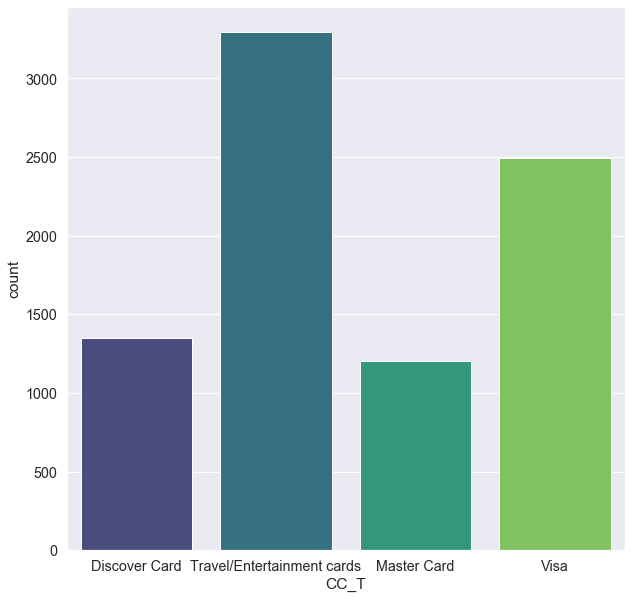

In [82]:
sns.countplot(x = "CC_T" , data = df , palette = "viridis")

* Identifing The Company 

In [45]:
Top_Companies = df["Company"].value_counts()[:10]
Top_Companies

Smith Group       15
Brown Ltd         15
Smith PLC         13
Smith LLC         13
Williams LLC      12
Smith and Sons    11
Davis and Sons    11
Brown Group       10
Johnson Ltd       10
Smith Inc         10
Name: Company, dtype: int64

In [83]:

Top_Companies.index

Index(['Smith Group', 'Brown Ltd', 'Smith PLC', 'Smith LLC', 'Williams LLC',
       'Smith and Sons', 'Davis and Sons', 'Brown Group', 'Johnson Ltd',
       'Smith Inc'],
      dtype='object')

[Text(0, 0, 'Smith Group'),
 Text(0, 0, 'Brown Ltd'),
 Text(0, 0, 'Smith PLC'),
 Text(0, 0, 'Smith LLC'),
 Text(0, 0, 'Williams LLC'),
 Text(0, 0, 'Smith and Sons'),
 Text(0, 0, 'Davis and Sons'),
 Text(0, 0, 'Brown Group'),
 Text(0, 0, 'Johnson Ltd'),
 Text(0, 0, 'Smith Inc')]

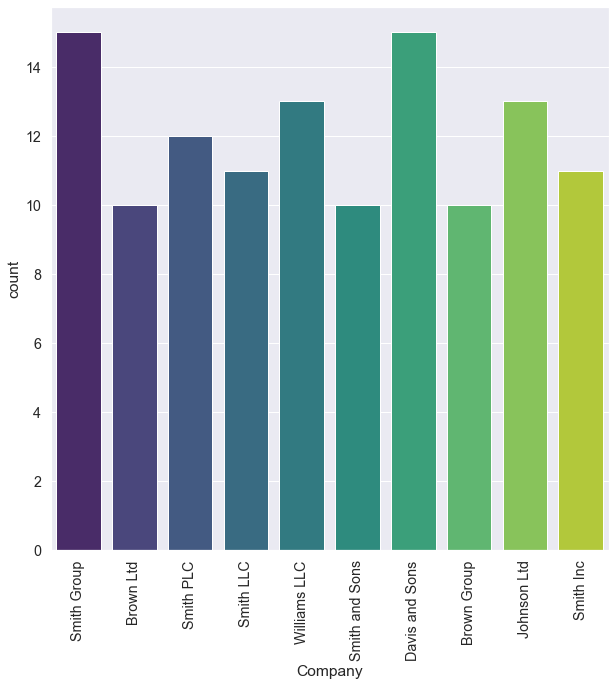

In [84]:
fig  = sns.countplot(x = "Company" , data = df[df["Company"].isin(Top_Companies.index)]  
              , palette = "viridis")
fig.set_xticklabels(labels =Top_Companies.index ,rotation = 90)

* Identifing_USer_Address

In [85]:
df["Address"]

0       16629 Pace Camp Apt. 448\nAlexisborough, NE 77...
1       9374 Jasmine Spurs Suite 508\nSouth John, TN 8...
2                        Unit 0065 Box 5052\nDPO AP 27450
3                   7780 Julia Fords\nNew Stacy, WA 45798
4       23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...
                              ...                        
9995        966 Castaneda Locks\nWest Juliafurt, CO 96415
9996    832 Curtis Dam Suite 785\nNorth Edwardburgh, T...
9997                Unit 4434 Box 6343\nDPO AE 28026-0283
9998                 0096 English Rest\nRoystad, IA 12457
9999       40674 Barrett Stravenue\nGrimesville, WI 79682
Name: Address, Length: 10000, dtype: object

In [86]:
def User_Address(x) :
    return x.split(" ")[1]

In [87]:
df["user_Address"] = df["Address"].apply(User_Address)

In [88]:
df[["user_Address"]]

,user_Address
0,Pace
1,Jasmine
2,0065
3,Julia
4,Munoz
...,...
9995,Castaneda
9996,Curtis
9997,4434
9998,English


* Identifing The Best_common_users_Jops

In [89]:
Top_user_jops=df["Job"].value_counts()[:5]
Top_user_jops

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Designer, jewellery                  27
Name: Job, dtype: int64

In [90]:
Top_user_jops.index

Index(['Interior and spatial designer', 'Lawyer', 'Social researcher',
       'Research officer, political party', 'Designer, jewellery'],
      dtype='object')

[Text(0, 0, 'Interior and spatial designer'),
 Text(0, 0, 'Lawyer'),
 Text(0, 0, 'Social researcher'),
 Text(0, 0, 'Research officer, political party'),
 Text(0, 0, 'Designer, jewellery')]

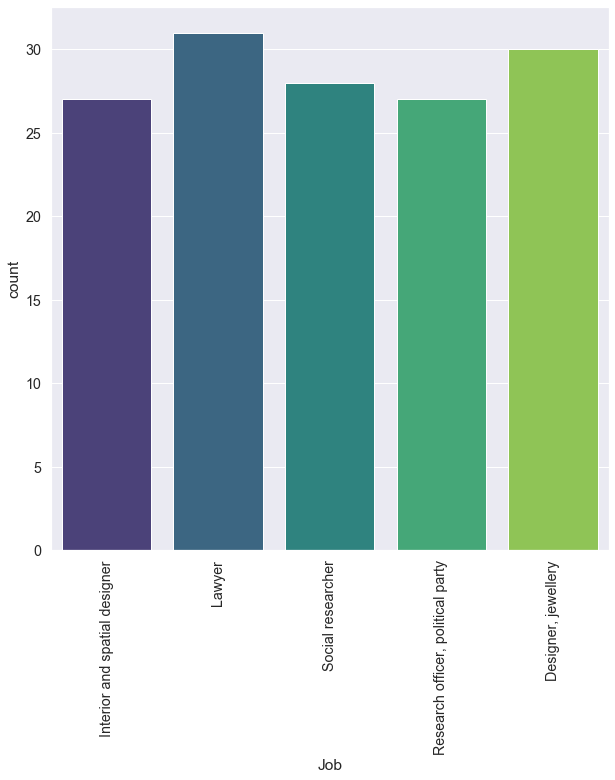

In [91]:
fig = sns.countplot(x = "Job" , data = df[df["Job"].isin(Top_user_jops.index)] , 
                   palette = "viridis")
fig.set_xticklabels(labels = Top_user_jops.index , rotation = 90)

* Identifing The Most Common Language of users

In [92]:
Top_user_languages = df["Language"].value_counts()
Top_user_languages

ru    1155
de    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: Language, dtype: int64

In [93]:
Top_user_languages.index

Index(['ru', 'de', 'el', 'pt', 'en', 'fr', 'es', 'it', 'zh'], dtype='object')

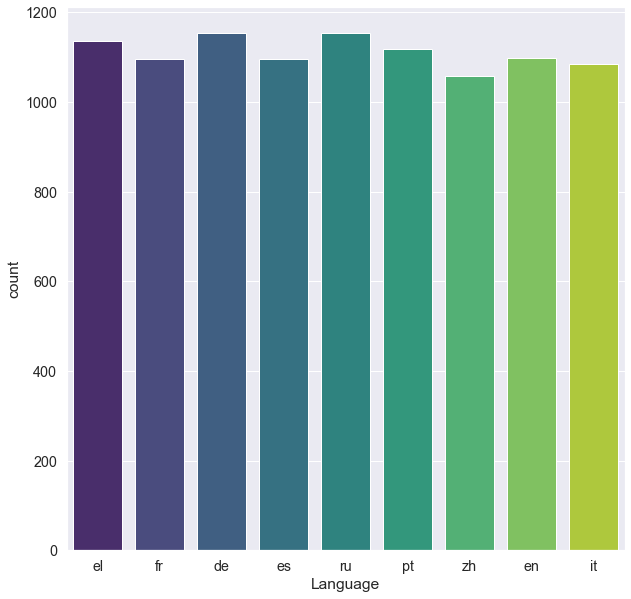

In [94]:
sns.countplot( x = "Language" , data = df[df["Language"].isin(Top_user_languages.index)] ,
                   palette = "viridis")
#fig.set_xticklabels( labels = Top_user_languages.index , rotation = 90)

* Web_data

In [95]:
df

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,...,IS_Bot,IS_PC,IS_Mobil,Browser_family,Browser_Version,OS_Family,OS_Version,Device_family,Device_Brand,Device_model
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,...,False,True,False,Opera,"(9, 56)",Linux,(),Other,None,None
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,...,False,True,False,Opera,"(8, 93)",Windows,"(ME,)",Other,None,None
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,...,False,True,False,IE,"(9, 0)",Windows,"(8,)",Other,None,None
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,...,False,True,False,Safari,"(5, 1)",Mac OS X,"(10, 8, 0)",Mac,Apple,Mac
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,...,False,True,False,Opera,"(9, 58)",Linux,(),Other,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,...,False,True,False,Chrome,"(14, 0, 877)",Windows,"(XP,)",Other,None,None
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,...,False,True,False,IE,"(9, 0)",Windows,"(XP,)",Other,None,None
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,...,False,True,False,Safari,"(4, 0, 3)",Mac OS X,"(10, 7, 8)",Mac,Apple,Mac
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,...,False,True,False,Firefox,"(3, 6, 13)",Mac OS X,"(10, 8, 8)",Mac,Apple,Mac


* Identifing E_Mail Providers

In [96]:
def Mail_Providers(E_mail) :
    return E_mail.split("@")[1]

In [97]:
df["E_mail_providers"] = df["Email"].apply(Mail_Providers)

In [98]:
df[["E_mail_providers"]]

,E_mail_providers
0,yahoo.com
1,reed.com
2,morales-harrison.com
3,olson-robinson.info
4,gmail.com
...,...
9995,wade-garner.com
9996,hotmail.com
9997,gmail.com
9998,reid.net


In [99]:
df["E_mail_providers"].value_counts()

hotmail.com           1638
yahoo.com             1616
gmail.com             1605
smith.com               42
williams.com            37
                      ... 
sheppard-white.com       1
doyle.biz                1
james-harvey.com         1
higgins.info             1
kennedy-martin.com       1
Name: E_mail_providers, Length: 3416, dtype: int64

In [100]:
Top_Providers = df["E_mail_providers"].value_counts()[:5]
Top_Providers

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: E_mail_providers, dtype: int64

In [101]:
Top_Providers.index

Index(['hotmail.com', 'yahoo.com', 'gmail.com', 'smith.com', 'williams.com'], dtype='object')

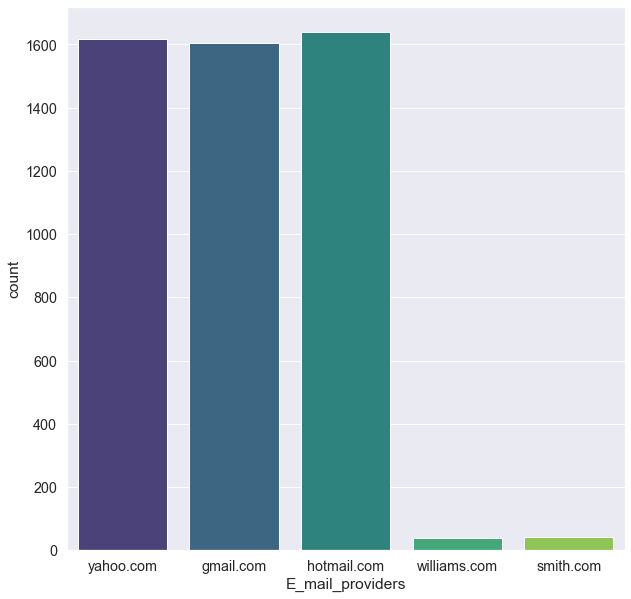

In [102]:
sns.countplot( x ="E_mail_providers" , 
              data = df[df["E_mail_providers"].isin(Top_Providers.index)], palette = "viridis" )

* 1  _ user_agent

In [103]:
import user_agents as UA

ua = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"
res = UA.parse(ua)
print(f"Is_bot :: {res.is_bot}\nIs_PC :: {res.is_pc}\nIs_Mobile :: {res.is_mobile}\n\
Browser_family :: {res.browser.family}\nBrowser_Version :: {res.browser.version}\n\
Device_family :: {res.device.family}\nDevice_Model :: {res.device.model}\n\
Device_Brand :: {res.device.brand}\nOS_family :: {res.os.family}\nOS_Version :: {res.os.version}")

Is_bot :: False
Is_PC :: True
Is_Mobile :: False
Browser_family :: Chrome
Browser_Version :: (83, 0, 4103)
Device_family :: Other
Device_Model :: None
Device_Brand :: None
OS_family :: Windows
OS_Version :: (10,)


In [104]:
def user_data(ua) :
    res = UA.parse(ua)
    IS_Bot = res.is_bot 
    IS_PC = res.is_pc
    IS_Mobil = res.is_mobile 
    Browser_family = res.browser.family
    Browser_Version = res.browser.version
    OS_Version = res.os.version
    OS_Family = res.os.family
    Device_family = res.device.family
    Device_Brand = res.device.brand
    Device_model = res.device.model
    
    return pd.Series((IS_Bot , IS_PC , IS_Mobil , Browser_family , Browser_Version , OS_Family ,
                     OS_Version , Device_family , Device_Brand , Device_model))
    

In [105]:
df[["IS_Bot" , "IS_PC" , "IS_Mobil" , "Browser_family" , "Browser_Version" , "OS_Family" , "OS_Version" , "Device_family" ,
    "Device_Brand" ,"Device_model" ]] = df["Browser Info"].apply(user_data)

In [106]:
df[["IS_Bot" , "IS_PC" , "IS_Mobil" , "Browser_family" , "Browser_Version" , "OS_Family" , "OS_Version" , "Device_family" ,
    "Device_Brand" ,"Device_model" ]]

,IS_Bot,IS_PC,IS_Mobil,Browser_family,Browser_Version,OS_Family,OS_Version,Device_family,Device_Brand,Device_model
0,False,True,False,Opera,"(9, 56)",Linux,(),Other,None,None
1,False,True,False,Opera,"(8, 93)",Windows,"(ME,)",Other,None,None
2,False,True,False,IE,"(9, 0)",Windows,"(8,)",Other,None,None
3,False,True,False,Safari,"(5, 1)",Mac OS X,"(10, 8, 0)",Mac,Apple,Mac
4,False,True,False,Opera,"(9, 58)",Linux,(),Other,None,None
...,...,...,...,...,...,...,...,...,...,...
9995,False,True,False,Chrome,"(14, 0, 877)",Windows,"(XP,)",Other,None,None
9996,False,True,False,IE,"(9, 0)",Windows,"(XP,)",Other,None,None
9997,False,True,False,Safari,"(4, 0, 3)",Mac OS X,"(10, 7, 8)",Mac,Apple,Mac
9998,False,True,False,Firefox,"(3, 6, 13)",Mac OS X,"(10, 8, 8)",Mac,Apple,Mac


In [107]:
df

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,...,IS_Bot,IS_PC,IS_Mobil,Browser_family,Browser_Version,OS_Family,OS_Version,Device_family,Device_Brand,Device_model
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,...,False,True,False,Opera,"(9, 56)",Linux,(),Other,None,None
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,...,False,True,False,Opera,"(8, 93)",Windows,"(ME,)",Other,None,None
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,...,False,True,False,IE,"(9, 0)",Windows,"(8,)",Other,None,None
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,...,False,True,False,Safari,"(5, 1)",Mac OS X,"(10, 8, 0)",Mac,Apple,Mac
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,...,False,True,False,Opera,"(9, 58)",Linux,(),Other,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,...,False,True,False,Chrome,"(14, 0, 877)",Windows,"(XP,)",Other,None,None
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,...,False,True,False,IE,"(9, 0)",Windows,"(XP,)",Other,None,None
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,...,False,True,False,Safari,"(4, 0, 3)",Mac OS X,"(10, 7, 8)",Mac,Apple,Mac
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,...,False,True,False,Firefox,"(3, 6, 13)",Mac OS X,"(10, 8, 8)",Mac,Apple,Mac


In [108]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price', 'CC_T', 'user_Address',
       'E_mail_providers', 'IS_Bot', 'IS_PC', 'IS_Mobil', 'Browser_family',
       'Browser_Version', 'OS_Family', 'OS_Version', 'Device_family',
       'Device_Brand', 'Device_model'],
      dtype='object')

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {"figure.figsize" : [ 10 , 10 ]} , font_scale=1.3)

* Identifiy The Most Browser Use our App

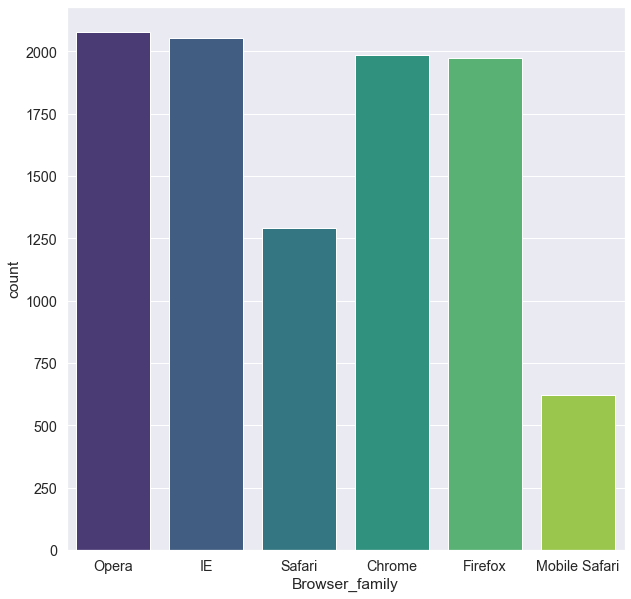

In [110]:
sns.countplot(x ="Browser_family"  , data = df , palette = "viridis")

* From The result above, we can see  some Observations ::
     * The Most User using our APP are Using Opera , IE Browsers
     * The Second Most User using our APP are Using Chrome , Firfox Browsers
     * The less User using our APP are Using Safari , Mobil_Safari  Browsers

* Identifing the most OS user our App

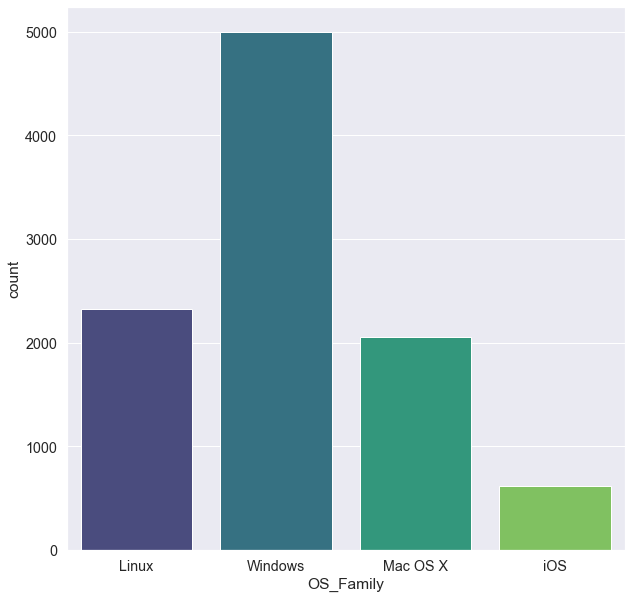

In [111]:
sns.countplot(x ="OS_Family"  , data = df , palette = "viridis")

* From The result above, we can see  some Observations ::
     * The Most User using our APP are Using Windows , Linux   Operating system
     * The Second Most User using our APP are Using Mac    Operating system
     * The less User using our APP are Using iOS    Operrating system

* Identing The Most Devices Use Our App

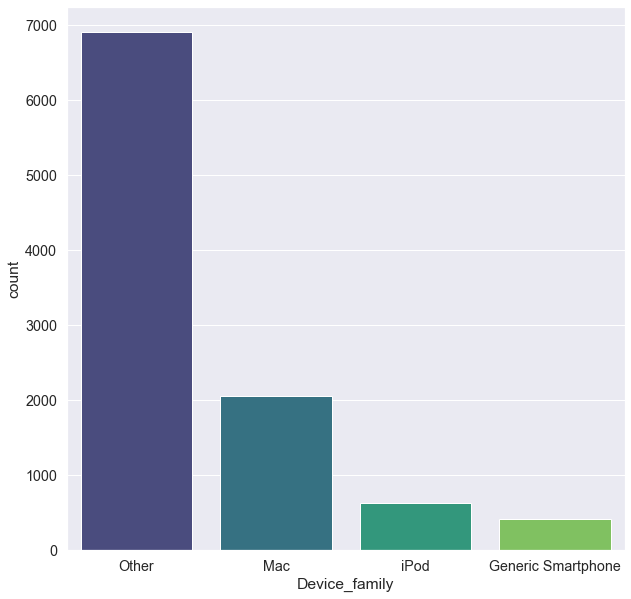

In [112]:
sns.countplot(x ="Device_family"  , data = df , palette = "viridis")

* IP_Address_data

In [121]:
from ip2geotools.databases.noncommercial import DbIpCity as IP 
res = IP.get('45.243.72.231', api_key='free')

print(f"IP_address :: {res.ip_address}\nCountry :: {res.country}\nCity :: {res.city}\n\
Region :: {res.region}\nLatitute :: {res.latitude}\nLangtude :: {res.longitude}")


IP_address :: 45.243.72.231
Country :: EG
City :: Cairo
Region :: Cairo
Latitute :: 30.0443879
Langtude :: 31.2357257


In [122]:
df1= df.head(100)

In [123]:


#def IP_data (ip) :
    #res = IP.get(ip , api_key="free")
    #IP_Address = res.ip_address
    #Country = res.country
    #City = res.city 
    #Region = res.region
    #Latitude = res.latitude
    #Longitude = res.longitude
    
    #return pd.Series((IP_Address , Country , City , Region , Latitude , Longitude ))

In [124]:
#df[["IP_Address" , "Country" , "City" , "Region" , "Latitude"
    #, "Longitude"]] = df1["IP Address"].apply(IP_data)

In [125]:
#def IP_data (ip) :
    t#ry : 
        #res = IP.get(ip , api_key="free")
        #IP_Address = res.ip_address
        #Country = res.country
        #City = res.city 
        #Region = res.region
        #Latitude = res.latitude
        #Longitude = res.longitude
        
        #return pd.Series((IP_Address , Country , City , Region , Latitude , Longitude ))
    #except :
        #return "Missing"
    


IndentationError: unexpected indent (<ipython-input-125-7c30cf0b4b87>, line 2)

In [126]:
#df[["IP_Address" , "Country" , "City" , "Region" , "Latitude"
    #, "Longitude"]] = df["IP Address"].apply(IP_data)

In [129]:
def IP_dayta (ip) :
    try : 
        res = IP.get(ip , api_key="free")
        #IP_Address = res.ip_address
        Country = res.country
        City = res.city 
        #Region = res.region
        #Latitude = res.latitude
        #Longitude = res.longitude
        try :
         return pd.Series((Country , City))
        #return pd.Series((IP_Address , Country , City , Region , Latitude , Longitude ))
    except :
        return "Missing"

IndentationError: unexpected indent (<ipython-input-129-18495baa382f>, line 10)

In [128]:
df[["Country" , "City"]] = df["IP Address"].apply(IP_dayta)

NameError: name 'IP_dayta' is not defined

In [120]:
df

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,...,IS_Bot,IS_PC,IS_Mobil,Browser_family,Browser_Version,OS_Family,OS_Version,Device_family,Device_Brand,Device_model
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,...,False,True,False,Opera,"(9, 56)",Linux,(),Other,None,None
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,...,False,True,False,Opera,"(8, 93)",Windows,"(ME,)",Other,None,None
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,...,False,True,False,IE,"(9, 0)",Windows,"(8,)",Other,None,None
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,...,False,True,False,Safari,"(5, 1)",Mac OS X,"(10, 8, 0)",Mac,Apple,Mac
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,...,False,True,False,Opera,"(9, 58)",Linux,(),Other,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,...,False,True,False,Chrome,"(14, 0, 877)",Windows,"(XP,)",Other,None,None
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,...,False,True,False,IE,"(9, 0)",Windows,"(XP,)",Other,None,None
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,...,False,True,False,Safari,"(4, 0, 3)",Mac OS X,"(10, 7, 8)",Mac,Apple,Mac
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,...,False,True,False,Firefox,"(3, 6, 13)",Mac OS X,"(10, 8, 8)",Mac,Apple,Mac
